1) Import the “telco_train.csv” file into the dataframe df and print

In [100]:
import pandas as pd
# load the data
df = pd.read_csv('Telco-midterm.csv')

a. the attribute names

In [101]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

b. Number of rows and columns

In [102]:
df.shape

(3087, 15)

2) Are there any null (i.e., missing) values in the target variable? How many null values were there? [hint: use the isna() method]

In [103]:
import numpy as np


In [104]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn                True
dtype: bool

In [105]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               4
dtype: int64

In [34]:
df['Churn'].isna().sum()

4

In [106]:
print(df.Churn.isnull().sum())
print(sum(df["Churn"].isna()))
print(len(df[df['Churn'].isna()]))
df[df['Churn'].isna()]

4
4
4


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
16,17,Male,0,1,1,43,1,1,No,Two year,0,Mailed check,24.25,1077.95,NaN
17,18,Male,0,0,0,7,1,1,Fiber optic,Month-to-month,1,Electronic check,99.80,673.25,NaN
112,113,Female,0,1,1,72,1,1,Fiber optic,Two year,1,Bank transfer (automatic),110.45,8058.85,NaN
113,114,Female,0,1,1,21,1,0,Fiber optic,Month-to-month,1,Electronic check,102.80,2110.15,NaN


3) Drop NULL (na) values that you found in (3) [hint: use the dropna() method and use the inplace = True parameter]. How many instances for each of the levels of the target variable (i.e., churn) are there left?

In [107]:
df.dropna(inplace=True)

In [37]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,0,0,3,1,0,No,Month-to-month,0,Mailed check,19.85,63.75,1.0
1,2,Female,0,0,0,68,1,1,Fiber optic,Two year,0,Credit card (automatic),110.25,7279.35,0.0
2,3,Male,0,1,1,25,1,0,Fiber optic,One year,1,Electronic check,90.40,2178.60,1.0
3,4,Male,0,1,0,24,1,1,DSL,One year,1,Electronic check,58.35,1346.90,0.0
4,5,Female,1,0,0,49,1,1,Fiber optic,Month-to-month,0,Credit card (automatic),101.55,5070.40,0.0


In [38]:
df.groupby("Churn").count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,
0.0,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253
1.0,830,830,830,830,830,830,830,830,830,830,830,830,830,830


In [39]:
df.Churn.value_counts()

0.0    2253
1.0     830
Name: Churn, dtype: int64

What is the mean and median value for tenure?

In [40]:
pd.pivot_table(df[['tenure','Churn']], index = 'Churn', aggfunc=['mean','median'])

,mean,median
,tenure,tenure
Churn,,
0.0,37.459831,37.0
1.0,17.581928,9.5


In [41]:
df.tenure.mean()

32.108336036328254

In [42]:
df.tenure.median()

29.0

How are customers distributed (i.e., frequency) across gender?

In [43]:
df['gender'].value_counts() 

Male      1551
Female    1532
Name: gender, dtype: int64

What’s the distribution of the tenure of customers? Plot a histogram to answer this question.

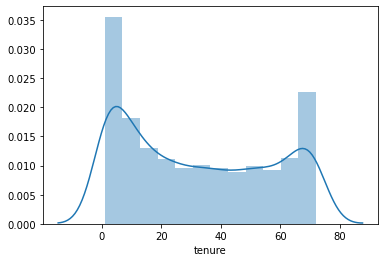

In [44]:
import seaborn as sns
sns.distplot(df['tenure'])

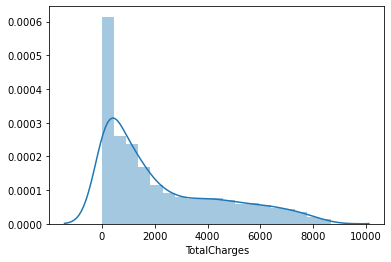

In [45]:
sns.distplot(df['TotalCharges'])

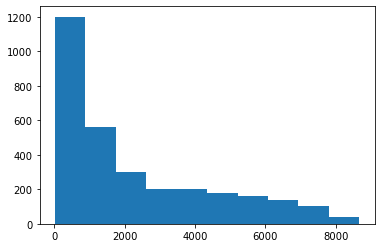

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
ax.hist(df.TotalCharges)
plt.show()

Make sure the data type for Churn are set as Category. [Hint: use the .astype('category') method if you need to change it]. Do you get the variable churn as category type?

In [47]:
df['Churn'].value_counts() 

0.0    2253
1.0     830
Name: Churn, dtype: int64

In [91]:
df['Churn'] = df['Churn'].astype('category')
new_categories = {0: 'Stay', 2: 'Leave'}
df.Churn.cat.rename_categories(new_categories, inplace=True)

In [56]:
df.dtypes

customerID             int64
gender                object
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService       object
Contract              object
PaperlessBilling       int64
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

What is the ratio of average of Total Charges for Male Senior Citizens to that of Female Senior citizens?

In [92]:
pd.pivot_table(df[['TotalCharges','gender']], index = 'gender', aggfunc=['mean','std'])

,mean,std
,TotalCharges,TotalCharges
gender,,
Female,2209.234726,2229.398678
Male,2258.761509,2248.374685


In [58]:
df[df.SeniorCitizen == 1].TotalCharges.mean()/df[df.SeniorCitizen == 0].TotalCharges.mean()

1.2180559535838644

Create a box plot with the Monthly Charges based on the type of contract the customers have. What can you conclude comparing the month-to-month compared to the two-year contract?

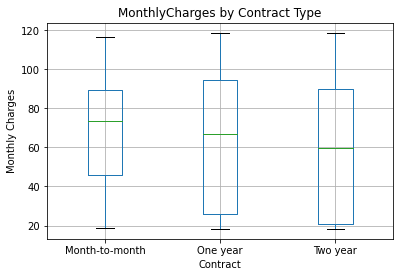

In [59]:
ax = df.boxplot(column='MonthlyCharges', by='Contract')
ax.set_ylabel('Monthly Charges')
plt.suptitle('')  # Suppress the titles
plt.title('MonthlyCharges by Contract Type')
plt.show()

A: Month-to-month contract is like positive skew and Two-year contract is normal distribution

Run the following line of code in your notebook (copy and paste it). What does it do?

In [108]:
df = pd.get_dummies(data=df, drop_first = True, columns=['gender', 'InternetService', 'PaymentMethod','Contract'])

A:  It converts categorical data into dummy or indicator variables.

11) Create a variable predictors with all the predictors (except for customerID and target variable). Create a variable outcome with the target variable

In [123]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [110]:
X=df.drop(columns=['customerID', 'Churn'])

In [111]:
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0,0,0,3,1,0,0,19.85,63.75,0,0,1,0,0,1,0,0
1,0,0,0,68,1,1,0,110.25,7279.35,0,1,0,1,0,0,0,1
2,0,1,1,25,1,0,1,90.40,2178.60,1,1,0,0,1,0,1,0
3,0,1,0,24,1,1,1,58.35,1346.90,1,0,0,0,1,0,1,0
4,1,0,0,49,1,1,0,101.55,5070.40,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,0,0,0,2,1,0,0,20.45,34.80,0,0,1,0,0,1,1,0
3083,0,1,1,12,1,1,1,84.50,916.90,0,1,0,0,1,0,0,0
3084,1,1,0,45,1,1,0,24.70,1174.35,1,0,1,1,0,0,1,0
3085,0,0,1,9,1,0,0,55.35,449.75,1,0,0,0,1,0,0,0


In [112]:
predictors=X.columns
predictors

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [113]:
y=df['Churn']

In [114]:
y.dtypes

dtype('float64')

12)Use the train_test_split function from scikit-learn to split the data into train/test using a 70%/30% split, respectively. Set the parameter random_state = 1. Make sure you import the necessary libraries from scikit-learn. Instantiate a Decision Tree model dt with the following parameters (max_depth = 4; random_state = 1) and fit the training data. Make sure you import the necessary libraries from scikit-learn.

In [115]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

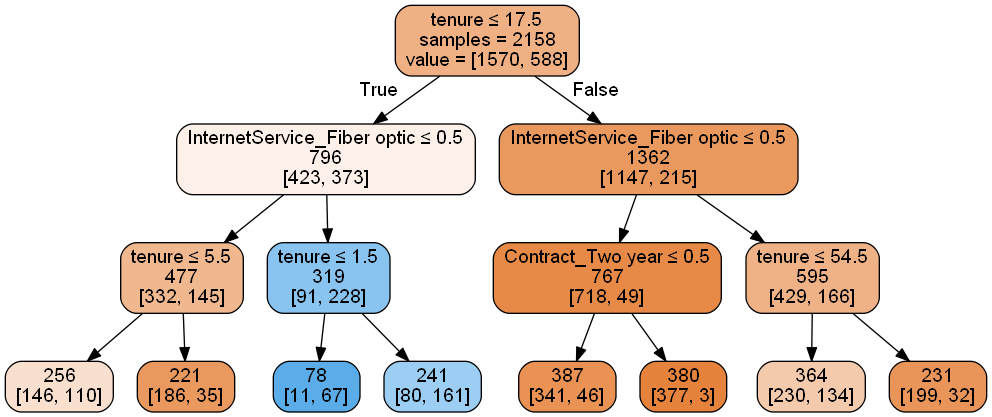

In [117]:
DecisionTree = DecisionTreeClassifier(max_depth =3)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)

What is the precision and recall on the test data? What is the f-measure on the test data

In [124]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score

In [125]:
classificationSummary(train_y, DecisionTree.predict(train_X))
classificationSummary(valid_y, DecisionTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7910)

       Prediction
Actual    0    1
     0 1479   91
     1  360  228
Confusion Matrix (Accuracy 0.7751)

       Prediction
Actual   0   1
     0 610  73
     1 135 107


In [126]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [127]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [128]:
y_pred, y_pred_prob = get_predictions(DecisionTree, train_X, train_y, valid_X)
print_scores(valid_y,y_pred,y_pred_prob)

train-set confusion matrix:
 [[1479   91]
 [ 360  228]]
test-set confusion matrix:
 [[610  73]
 [135 107]]
recall score:  0.44214876033057854
precision score:  0.5944444444444444
f1 score:  0.5071090047393365
accuracy score:  0.7751351351351351
ROC AUC: 0.7929981970644822


What is the most important variable? [make sure you show how you determined it]

                                  feature  importance       std
4                            PhoneService    0.007924  0.003847
14             PaymentMethod_Mailed check    0.013820  0.006659
12  PaymentMethod_Credit card (automatic)    0.014799  0.006568
11                     InternetService_No    0.015540  0.015957
2                              Dependents    0.022250  0.006677
15                      Contract_One year    0.022405  0.013203
0                           SeniorCitizen    0.024092  0.007116
1                                 Partner    0.024234  0.006969
5                           MultipleLines    0.024588  0.007277
6                        PaperlessBilling    0.027131  0.007042
9                             gender_Male    0.030802  0.007912
16                      Contract_Two year    0.042703  0.035845
13         PaymentMethod_Electronic check    0.046741  0.032161
10            InternetService_Fiber optic    0.046886  0.030788
3                                  tenur

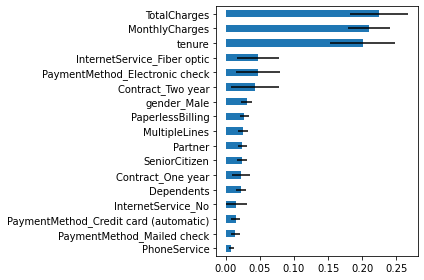

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

16) Using the data from (10) and (11), instantiate a Logistic Regression model lr with the following parameters (random_state = 1, solver = 'liblinear' ) and fit the training data.

In [132]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#code here
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns))
print()

intercept  -0.28701086180985613
                                          coeff
SeniorCitizen                          0.273523
Partner                                0.082628
Dependents                            -0.194910
tenure                                -0.056027
PhoneService                          -0.301823
MultipleLines                          0.226241
PaperlessBilling                       0.232486
MonthlyCharges                         0.001598
TotalCharges                           0.000224
gender_Male                           -0.066460
InternetService_Fiber optic            0.877394
InternetService_No                    -0.578943
PaymentMethod_Credit card (automatic) -0.200009
PaymentMethod_Electronic check         0.381223
PaymentMethod_Mailed check            -0.066166
Contract_One year                     -0.405516
Contract_Two year                     -1.532892



What is the precision and recall on the test data? What is the f-measure on the test data?

In [133]:
prediction_train = logit_reg.predict(train_X)
prediction_valid = logit_reg.predict(valid_X)
print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

Accuracy on train is: 0.7970342910101946
Accuracy on test is: 0.7848648648648648


In [143]:
y_pred, y_pred_prob = get_predictions(logit_reg, train_X, train_y, valid_X)
print_scores(valid_y,y_pred,y_pred_prob)

train-set confusion matrix:
 [[1419  151]
 [ 287  301]]
test-set confusion matrix:
 [[593  90]
 [109 133]]
recall score:  0.5495867768595041
precision score:  0.5964125560538116
f1 score:  0.572043010752688
accuracy score:  0.7848648648648648
ROC AUC: 0.829495541062159


In [ ]:
Which model (decision tree or logistic regression) performs better?

In [ ]:
A: Decision Tree Model is better

#20    Price = 26.54

#21          C

#22         Model A. Since it has higher recall of the positive classes were successfully predicted by the model.

#23         2/3

#24         C

#25         D

#26        I will choose A since it has the larger AUC

#27         B

#28         1

#29         d

#30         C